## Review steps

1. Data collection
2. Data preprocessing
3. train-test split
4. Choosing ml/dl model
5. Train model
6. Do prediction and evaluate the model

In [1]:
import numpy as np # linear algebra import pandas
from numpy import array
import pandas as pd
import math 
import seaborn as sns 
import datetime as dt 
from datetime import datetime
sns.set_style("whitegrid") 
from pandas.plotting import autocorrelation_plot 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot" )
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm
from sklearn.svm import SVR

## Loading data

In [2]:
data= pd.read_csv("Honda-2.csv",delimiter=";")
data

,Date,Price,Open,High,Low,Volume,Change
0,04/01/2018,"1328,70","1308,30","1328,70","1302,00","14890000,0","0,032200"
1,05/01/2018,"1340,30","1333,30","1351,30","1330,00","14300000,0","0,008700"
2,09/01/2018,"1336,70","1347,30","1352,30","1332,30","10340000,0","-0,002700"
3,10/01/2018,"1367,30","1345,00","1383,70","1342,70","14080000,0","0,022900"
4,11/01/2018,"1342,00","1345,00","1351,70","1332,70","12090000,0","-0,018500"
...,...,...,...,...,...,...,...
1447,08/12/2023,"1458,00","1488,00","1490,00","1450,50","28600000,0","-0,025700"
1448,11/12/2023,"1494,50","1496,00","1501,00","1486,50","14850000,0","0,025000"
1449,12/12/2023,"1477,50","1501,00","1502,00","1477,50","11320000,0","-0,011400"
1450,13/12/2023,"1469,00","1476,50","1477,00","1456,00","14080000,0","-0,005800"


## Data Exploration

In [3]:
# Check the data type of each value column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1452 non-null   object
 1   Price   1452 non-null   object
 2   Open    1452 non-null   object
 3   High    1452 non-null   object
 4   Low     1452 non-null   object
 5   Volume  1452 non-null   object
 6   Change  1452 non-null   object
dtypes: object(7)
memory usage: 79.5+ KB


In [4]:
# Reformat the date data type
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')  # Ví dụ cho định dạng dd/mm/yyyy
data['Date']

0      2018-01-04
1      2018-01-05
2      2018-01-09
3      2018-01-10
4      2018-01-11
          ...    
1447   2023-12-08
1448   2023-12-11
1449   2023-12-12
1450   2023-12-13
1451   2023-12-14
Name: Date, Length: 1452, dtype: datetime64[ns]

In [5]:
# Clean data and cast data for calculation
data['Price'] = data['Price'].str.replace(',', '.').astype(float)
data['Open'] = data['Open'].str.replace(',', '.').astype(float)
data['High'] = data['High'].str.replace(',', '.').astype(float)
data['Low'] = data['Low'].str.replace(',', '.').astype(float)
data['Volume'] = data['Volume'].str.replace(',', '.').astype(float)
data['Change'] = data['Change'].str.replace(',', '.').astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1452 non-null   datetime64[ns]
 1   Price   1452 non-null   float64       
 2   Open    1452 non-null   float64       
 3   High    1452 non-null   float64       
 4   Low     1452 non-null   float64       
 5   Volume  1452 non-null   float64       
 6   Change  1452 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 79.5 KB


In [6]:
# Gets descriptive statistical information about a DataFrame or a Series
data.describe()

,Date,Price,Open,High,Low,Volume,Change
count,1452,1452.000000,1452.000000,1452.000000,1452.000000,1.452000e+03,1452.000000
mean,2020-12-26 16:00:59.504132352,1105.688912,1106.123485,1115.705579,1095.946556,1.393168e+07,0.000222
min,2018-01-04 00:00:00,711.800000,717.200000,746.700000,706.700000,3.360000e+06,-0.071000
25%,2019-07-01 18:00:00,995.375000,995.725000,1005.600000,986.525000,1.040000e+07,-0.010100
50%,2020-12-28 12:00:00,1087.000000,1088.300000,1097.150000,1078.150000,1.284000e+07,0.000000
75%,2022-06-24 18:00:00,1172.700000,1174.400000,1181.325000,1163.850000,1.624750e+07,0.010225
max,2023-12-14 00:00:00,1802.300000,1802.300000,1821.000000,1780.000000,4.645000e+07,0.106200
std,NaN,183.522697,184.289369,184.962911,182.567989,5.240151e+06,0.018327


## Data Visualization

In [7]:
# Reshape turns df into a NumPy array of size (-1, 1)
df=data['Price'].values
df = df.reshape(-1, 1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # Perform data normalization according to the min-max scaling method
price_scaled=scaler.fit_transform(df) # Fit và transform the data
price_scaled

array([[0.56570381],
       [0.57634113],
       [0.57303989],
       ...,
       [0.70215497],
       [0.69436039],
       [0.62696011]])

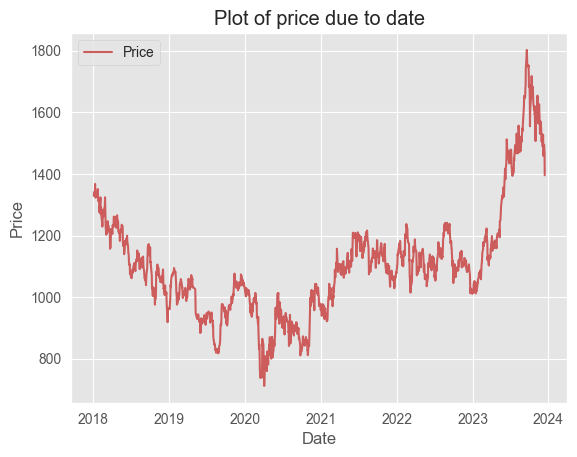

In [9]:
# Create plot
plt.figure(figure=(10,6))
plt.plot(data['Date'],data['Price'].values, label="Price", color="IndianRed")

# Adding title
plt.title("Plot of price due to date")

# Adding label
plt.xlabel("Date")
plt.ylabel("Price")

# Show the plot
plt.legend()
plt.show()

## Data Preprocessing

### Split data into training and testing set

### Training - testing 7:3

In [10]:
# Split train test validation in ratio 7:3
# Split the data into training, testing
train_size = int(0.7 * len(data))
test_size = int(0.3 * len(data))


X2D = data[['High']] # Independent variable in 2-dimensional array
Y2D = data[['Price']] # Dependent variable in 2-dimensional array

### SVR

In [11]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index # Get the index before converting it to a 2-dimensional array (serves plot)
y_train = Y2D[:train_size].values.ravel()

# Create SVR model with RBF kernel
model = SVR(kernel='rbf')
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],             
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  
    'epsilon': [0.001, 0.01, 0.1, 1, 10]     
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model using grid search
svr_rbf = grid_search.fit(x_train,y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best parameters: {'C': 1000, 'epsilon': 1, 'gamma': 'scale'}
Best score: 776.6519569614505


In [12]:
# Predict test
y_pred = svr_rbf.predict(x_test)
y_pred

array([1035.44472194, 1068.86819091, 1049.05340537, 1051.75963694,
       1065.05885398, 1082.84300661, 1113.25746849, 1105.93915156,
       1129.0111518 , 1158.82635251, 1138.50572026, 1151.02585803,
       1157.03230958, 1179.80062714, 1177.72588392, 1170.41417652,
       1147.24666977, 1147.24666977, 1148.92445216, 1129.31381677,
       1083.76304021, 1068.29949126, 1073.94760169, 1079.80000421,
       1081.0001981 , 1084.40661928, 1092.67021359, 1080.44651813,
       1098.84861336, 1142.34000136, 1138.50572026, 1128.00413396,
       1121.72792476, 1130.72961815, 1101.91389232, 1131.03371651,
       1152.4991401 , 1152.07803291, 1148.92445216, 1122.32050841,
       1106.31564298, 1089.27268549, 1098.47825228, 1077.02146537,
       1063.52278176, 1075.44049278, 1061.59229316, 1069.53052081,
       1070.75735892, 1068.29949126, 1043.27337241, 1042.66002051,
       1053.75037375, 1057.3032567 , 1061.88261475, 1099.12654025,
       1102.19350428, 1110.38765527, 1092.94596524, 1123.01323

In [13]:
last_row = data.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[1395.5]])

## Predict

In [14]:
# Create an array containing the predict value of the next 30 days
x_next_30_days = []
# Predict the price for the next 30 days based on the price of the previous day
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)
x_next_30_days

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with f

[array([1365.82912387]),
 array([1352.68372685]),
 array([1342.48037057]),
 array([1333.40340319]),
 array([1324.74398195]),
 array([1316.13900014]),
 array([1307.38382256]),
 array([1298.37306878]),
 array([1289.0815846]),
 array([1279.55702209]),
 array([1269.90946012]),
 array([1260.28964221]),
 array([1250.85517991]),
 array([1241.73355475]),
 array([1232.99549994]),
 array([1224.6471942]),
 array([1216.63900633]),
 array([1208.88180971]),
 array([1201.26271497]),
 array([1193.65667363]),
 array([1185.93442754]),
 array([1177.96943852]),
 array([1169.64733969]),
 array([1160.88159158]),
 array([1151.63768705]),
 array([1141.96332957]),
 array([1132.0118766]),
 array([1122.03580977]),
 array([1112.33239765]),
 array([1103.15706836])]

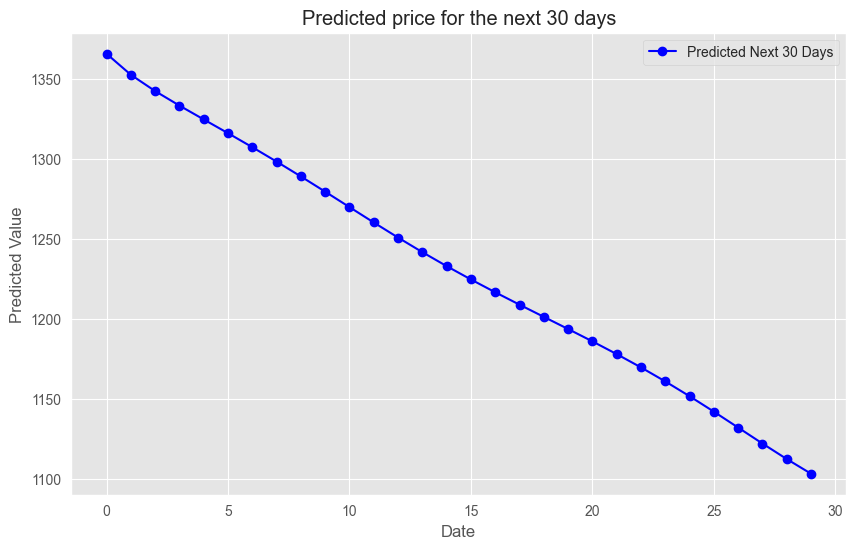

In [15]:
# Drawing plot
plt.figure(figsize=(10, 6))
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Setting title
plt.title('Predicted price for the next 30 days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.legend()

# Show plot
plt.show()

In [16]:
# Convert the predict price column into a 2-dimensional array
y_pred = y_pred.reshape(-1,1)

In [19]:
# Create index for the next 30 days
last_index =  data.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

In [20]:
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', str(test_mape*100)+'%')
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)
# Huber loss
hl= mean_squared_error(y_test, y_pred, multioutput='raw_values')
print('Huber loss:', hl)

Testing RMSE: 232.4522014021196
Testing MAPE: 7.3484708536206425%
Testing MAE: 115.66770678728936
Huber loss: [54034.02593669]


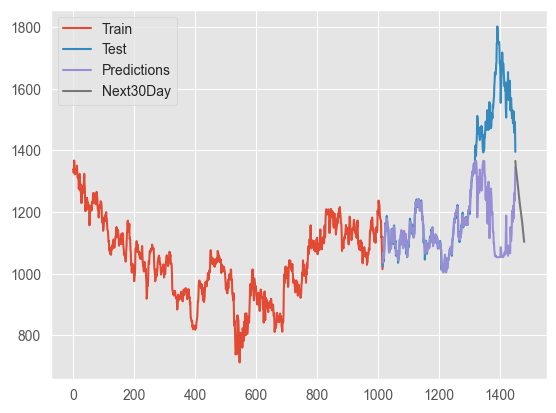

In [21]:
plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates,x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()